# Linear Regression from Scratch

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Univariate Linear Regression
### Load dataset

In [2]:
dataset_file = "./dataset/example1_data.csv"
DF = pd.read_csv(dataset_file)
X = DF['X'].values
y = DF['Y'].values

### Plot dataset

Text(0, 0.5, 'Profit in $10,000s')

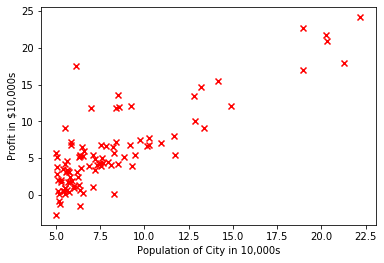

In [3]:
plt.scatter(X,y,marker='x',c='red')
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")

### Setup for univariate LR

In [4]:
theta = np.zeros((2,1)) # parameters
iterations=1500 # Number of iterations
alpha=0.01 # Learning rate

# Add intercept term 
xtrain = np.array([np.ones(X.shape[0]), X])


### Without Training

In [5]:
hx = np.dot(theta.T, xtrain)

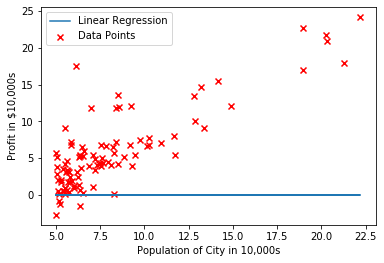

In [6]:
plt.scatter(X,y,marker='x',c='red')
plt.plot(X,hx.reshape(X.shape[0]))
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.legend(['Linear Regression','Data Points'])

## Implementation of LR

In [7]:
def compute_cost(X, y, theta):
    """ Calculate the cost """
    m = X.shape[1] # Number of training example
    
    hx = np.dot(theta.T, X)
    cost = np.sum((hx - y)**2, axis=1) / (2*m)
    
    return cost[0]

In [8]:
def gradient_descent(X, y, theta, learning_rate, iterations):
    """ Calculate gradient descent. """
    
    costs = np.zeros((iterations,1)) # for storing cost per iteration
    
    for i in range(iterations):
        m = X.shape[1] # number of training example

        diff = (np.dot(theta.T, X) -y)
        theta = theta - (learning_rate/m) * np.dot(X, diff.T) # update theta
        costs[i][0] = compute_cost(X, y, theta) # get the cost
    
    return costs, theta
    

In [9]:
compute_cost(xtrain, y, np.array([[-1],[2]]))

54.24245508201238

### Training

In [10]:
cost, adjusted_theta = gradient_descent(xtrain, y, theta, alpha, iterations)

### Prediction with learned theta

In [11]:
predictions = np.dot(adjusted_theta.T, xtrain) # predict after learn parameters

#### Ploting the linear fit

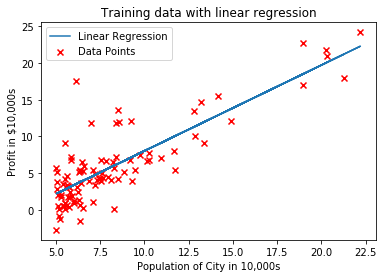

In [12]:
plt.scatter(X,y,marker='x',c='red')
plt.plot(X,predictions.reshape(-1))
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.legend(['Linear Regression','Data Points'])
plt.title('Training data with linear regression')
plt.show()

#### Ploting cost function

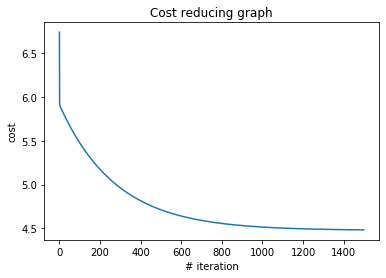

In [13]:
plt.plot(cost)
plt.xlabel("# iteration")
plt.ylabel("cost")
plt.title('Cost reducing graph')
plt.show()


## Multivariate Linear Regression

### Import dataset

In [14]:
dataset_file = './dataset/dataset2_multi_features.csv'
X = pd.read_csv(dataset_file, usecols=['x1','x2']).values
y = pd.read_csv(dataset_file, usecols=['y']).values

In [15]:
# Dataset information

print('Number of examples: ', X.shape[0])
print('Number of features: ', X.shape[1])

Number of examples:  47
Number of features:  2


### Feature scaling/ normalization

In [16]:
def feature_scaling(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return np.divide(X - mean, std), mean, std


In [17]:
xtrain, mean, std = feature_scaling(X)

### Setup for multivariate LR

In [18]:
learning_rate = 0.01
iterations = 500
theta = np.zeros((3, 1))
m = X.shape[0]

# Add intercept term (1's)
xtrain = np.hstack( (np.ones((X.shape[0],1)), xtrain) ).reshape(3, m)

### Training

In [19]:
cost, up_theta = gradient_descent(xtrain, y, theta, learning_rate, iterations)

#### Ploting cost function

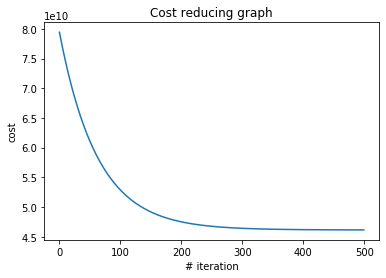

In [20]:
plt.plot(cost)
plt.xlabel("# iteration")
plt.ylabel("cost")
plt.title('Cost reducing graph')
plt.show()

### Try various lerning rate

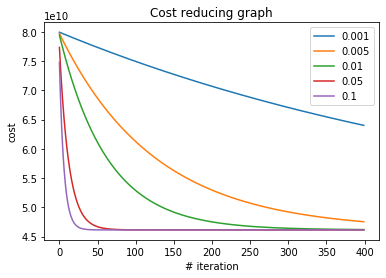

In [21]:
learning_rates = [0.001, 0.005, 0.01, 0.05, 0.1]

for lr in learning_rates:
    cost, up_theta = gradient_descent(xtrain, y, theta, learning_rate=lr, iterations=400)
    plt.plot(cost)

plt.legend([0.001, 0.005, 0.01, 0.05, 0.1])
plt.xlabel("# iteration")
plt.ylabel("cost")
plt.title('Cost reducing graph')
plt.show()